# Soal 8

1. [Bagi data menjadi training dan test set](#1)
2. [Buat model regression tree. Berapa MSEnya?](#2)
3. [Gunakan cross-validation untuk mencari level tree yang terbaik](#3)
4. [Gunakan bagging untuk menganalisa data](#4)
5. [Gunakan random forest untuk menganalisa data](#5)

## 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz  
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

In [2]:
df = pd.read_csv('../dataset/Carseats.csv')

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [12]:
df.shape

(400, 15)

In [6]:
# ubah qualitative data menjadi quantitative dengan dummy variabel
df = pd.get_dummies(df)

In [7]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [9]:
# bagi data menjadi training dan test
# unntuk X, ambil semua baris
# kolom hanya di ambil dari Comprice sampai terakhir
X = df.iloc[:,1:]
Y = df['Sales']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=1)

In [11]:
X_train.shape

(280, 14)

[kembali ke atas](#Soal-8)

## 2

In [13]:
TREE_REGR = DecisionTreeRegressor(max_depth=5)
TREE_REGR.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [14]:
mean_squared_error(Y_test, TREE_REGR.predict(X_test))

5.564392896935154

[kembali ke atas](#Soal-8)

## 3

In [15]:
TREE_REGR = DecisionTreeRegressor(random_state=1)
param_grid = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

In [17]:
# K=10
grid_search = GridSearchCV(TREE_REGR, param_grid=param_grid, cv=10)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [18]:
grid_search.best_estimator_
# max_depth terbaik adalah 9

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

[kembali ke atas](#Soal-8)

## 4

In [19]:
Bagging = BaggingRegressor()
Bagging.fit(X_train, Y_train)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [20]:
mean_squared_error(Y_test, Bagging.predict(X_test))

3.2297930416666665

[kembali ke atas](#Soal-8)

## 5

In [22]:
RF = RandomForestRegressor()
RF.fit(X_train, Y_train)

/home/uulwake/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
mean_squared_error(Y_test, RF.predict(X_test))

3.13903945

In [27]:
pd.DataFrame(RF.feature_importances_ * 100)

,0
0,9.692957
1,4.761746
2,7.002991
3,5.253884
4,27.791098
5,11.988269
6,2.699566
7,5.042935
8,22.833979
9,2.132138


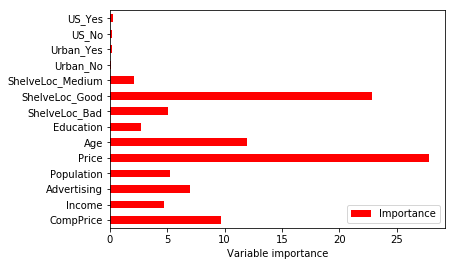

In [29]:
importance = pd.DataFrame({'Importance':RF.feature_importances_*100}, index=X_train.columns)
# importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r')
importance.plot(kind='barh', color='r')
plt.xlabel('Variable importance')
plt.legend(loc='lower right')

[kembali ke atas](#Soal-8)